In [25]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint, EarlyStopping

import pandas as pd
import numpy as np 
import tensorflow as tf
import matplotlib.pyplot as plt
import os

In [2]:
# seed 값 설정

seed = 42 
np.random.seed(seed)
tf.random.set_seed(42)

In [5]:
# 데이터 입력

df = pd.read_csv('/content/drive/MyDrive/dataset/wine.csv', header=None)

In [7]:
df = df.sample(frac=1) # frac = 1 (100% 사용, shuffle만 된 것) 

In [8]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12
4676,6.2,0.25,0.38,7.9,0.045,54.0,208.0,0.99572,3.17,0.46,9.1,5,0
6321,6.0,0.25,0.28,7.7,0.053,37.0,132.0,0.99489,3.06,0.50,9.4,6,0
4607,5.0,0.30,0.33,3.7,0.030,54.0,173.0,0.98870,3.36,0.30,13.0,7,0
4394,6.4,0.22,0.32,7.2,0.028,15.0,83.0,0.99300,3.13,0.55,10.9,8,0
3404,7.5,0.33,0.39,12.4,0.065,29.0,119.0,0.99740,3.16,0.39,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5607,6.1,0.25,0.48,15.8,0.052,25.0,94.0,0.99782,3.07,0.45,9.2,6,0
3236,8.1,0.12,0.49,1.2,0.042,43.0,160.0,0.99340,3.13,0.48,9.7,6,0
5736,7.4,0.31,0.26,8.6,0.048,47.0,206.0,0.99640,3.26,0.36,9.1,5,0
1551,7.1,0.67,0.00,2.3,0.083,18.0,27.0,0.99768,3.44,0.54,9.4,5,1


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 4676 to 3731
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       6497 non-null   float64
 1   1       6497 non-null   float64
 2   2       6497 non-null   float64
 3   3       6497 non-null   float64
 4   4       6497 non-null   float64
 5   5       6497 non-null   float64
 6   6       6497 non-null   float64
 7   7       6497 non-null   float64
 8   8       6497 non-null   float64
 9   9       6497 non-null   float64
 10  10      6497 non-null   float64
 11  11      6497 non-null   int64  
 12  12      6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 710.6 KB


In [10]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,0.246114
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,0.430779
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,0.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,0.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,0.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000


In [11]:
df.values

array([[ 6.2 ,  0.25,  0.38, ...,  9.1 ,  5.  ,  0.  ],
       [ 6.  ,  0.25,  0.28, ...,  9.4 ,  6.  ,  0.  ],
       [ 5.  ,  0.3 ,  0.33, ..., 13.  ,  7.  ,  0.  ],
       ...,
       [ 7.4 ,  0.31,  0.26, ...,  9.1 ,  5.  ,  0.  ],
       [ 7.1 ,  0.67,  0.  , ...,  9.4 ,  5.  ,  1.  ],
       [ 7.1 ,  0.22,  0.32, ...,  9.6 ,  6.  ,  0.  ]])

In [19]:
dataset = df.values

x = dataset[:, :-1]
y = dataset[:,-1]

In [20]:
x, x.shape, y, y.shape

(array([[ 6.2 ,  0.25,  0.38, ...,  0.46,  9.1 ,  5.  ],
        [ 6.  ,  0.25,  0.28, ...,  0.5 ,  9.4 ,  6.  ],
        [ 5.  ,  0.3 ,  0.33, ...,  0.3 , 13.  ,  7.  ],
        ...,
        [ 7.4 ,  0.31,  0.26, ...,  0.36,  9.1 ,  5.  ],
        [ 7.1 ,  0.67,  0.  , ...,  0.54,  9.4 ,  5.  ],
        [ 7.1 ,  0.22,  0.32, ...,  0.38,  9.6 ,  6.  ]]),
 (6497, 12),
 array([0., 0., 0., ..., 0., 1., 0.]),
 (6497,))

In [21]:
# 모델 설정
model = Sequential()
model.add(Dense(30, input_dim = 12 , activation = 'relu'))
# h1만 나오는 코드 : input_dim=12 ,  활성화 함수 relu
model.add(Dense(12, activation = 'relu'))
model.add(Dense(8, activation ='relu'))
model.add(Dense(1, activation= 'sigmoid')) # 이진분류(sigmoid)

In [22]:
# 모델 컴파일(환경설정)
# model.compile(loss='binary_crossentropy', # 이진 분류 
           #   optimizer = 'adam',
            #  metrics = ['accuracy'])

In [23]:
# 결과 출력 (학습)
# model.fit(x,y,epochs =200, batch_size=200) # 200번 반복, 200개 묶음으로 입력

Epoch 1/200
33/33 [==============================] - 3s 4ms/step - loss: 0.3169 - accuracy: 0.8599
Epoch 2/200
33/33 [==============================] - 0s 4ms/step - loss: 0.2382 - accuracy: 0.9215
Epoch 3/200
33/33 [==============================] - 0s 4ms/step - loss: 0.1953 - accuracy: 0.9300
Epoch 4/200
33/33 [==============================] - 0s 4ms/step - loss: 0.1792 - accuracy: 0.9352
Epoch 5/200
33/33 [==============================] - 0s 4ms/step - loss: 0.1709 - accuracy: 0.9384
Epoch 6/200
33/33 [==============================] - 0s 4ms/step - loss: 0.1626 - accuracy: 0.9409
Epoch 7/200
33/33 [==============================] - 0s 4ms/step - loss: 0.1541 - accuracy: 0.9435
Epoch 8/200
33/33 [==============================] - 0s 4ms/step - loss: 0.1464 - accuracy: 0.9467
Epoch 9/200
33/33 [==============================] - 0s 4ms/step - loss: 0.1371 - accuracy: 0.9491
Epoch 10/200
33/33 [==============================] - 0s 4ms/step - loss: 0.1359 - accuracy: 0.9500
Epoch 11/

In [24]:
# 결과 출력
# print('\n Accuracy : %.4f'% (model.evaluate(x,y)[1]))

204/204 [==============================] - 2s 6ms/step - loss: 0.0365 - accuracy: 0.9903

 Accuracy : 0.9903


In [26]:
#  모델 저장 폴더 설정
MODEL_DIR = './model'
if not os.path.exists(MODEL_DIR):
  os.mkdir(MODEL_DIR)


In [32]:
# 모델 저장 조건 설정
modelpath= "./model/{epoch:02d}-{val_loss:.4f}.hdf5" # 모델 저장 경로 설정
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss',verbose=1,save_best_only=True)
# save_best_only=True : 모델 성능이 좋아지면 자동 저장

In [36]:
# 모델 실행 및 저장
# model.fit(x,y, validation_split=0.2, epochs=200, batch_size=200, verbose=1, callbacks=[checkpointer])

In [ ]:
# loss: 0.0265 - accuracy: 0.9919 - val_loss: 0.0564 - val_accuracy: 0.9869

In [38]:
# 조기종료 설정
ealry_stopping_callback = EarlyStopping(monitor='val_loss',patience=100)

In [40]:
history = model.fit(x,y, validation_split=0.2, epochs=200, batch_size=200, verbose=1, callbacks=[ealry_stopping_callback, checkpointer])

Epoch 1/200
22/26 [========================>.....] - ETA: 0s - loss: 0.0269 - accuracy: 0.9923
Epoch 1: val_loss did not improve from 0.04794
26/26 [==============================] - 0s 13ms/step - loss: 0.0257 - accuracy: 0.9923 - val_loss: 0.0517 - val_accuracy: 0.9885
Epoch 2/200
19/26 [====================>.........] - ETA: 0s - loss: 0.0275 - accuracy: 0.9937
Epoch 2: val_loss did not improve from 0.04794
26/26 [==============================] - 0s 10ms/step - loss: 0.0249 - accuracy: 0.9940 - val_loss: 0.0508 - val_accuracy: 0.9877
Epoch 3/200
19/26 [====================>.........] - ETA: 0s - loss: 0.0256 - accuracy: 0.9921
Epoch 3: val_loss did not improve from 0.04794
26/26 [==============================] - 0s 10ms/step - loss: 0.0256 - accuracy: 0.9927 - val_loss: 0.0561 - val_accuracy: 0.9892
Epoch 4/200
26/26 [==============================] - ETA: 0s - loss: 0.0304 - accuracy: 0.9911
Epoch 4: val_loss did not improve from 0.04794
26/26 [==============================] - 0

In [47]:
# 결과 출력
print('\n Acc: %.4f'%(model.evaluate(x,y))[1])

204/204 [==============================] - 1s 4ms/step - loss: 0.0266 - accuracy: 0.9931

 Acc: 0.9931


In [41]:
# y_vloss 변수 생성해서 validation set 으로 측정한 실험결과 오차값 저장
y_vloss = history.history['val_loss']

# y_acc 변수 생성해서 validation set으로 측정한 실험결과 오차값 저장
y_acc = history.history['val_accuracy']

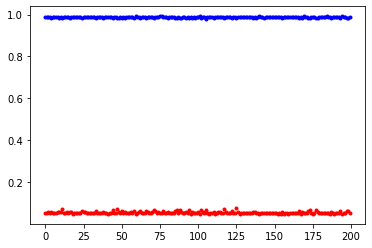

In [46]:
# x 값 지정 정확도는 파란색. 오차는 빨간 색 표시

x_len = np.arange(len(y_acc))
plt.plot(x_len, y_vloss, 'o', c='red', markersize=3)
plt.plot(x_len, y_acc, 'o', c='blue', markersize=3)
plt.show()